# Ahmed Sharaf
##  Numerical Optmization 
###         1 - Implementation  Adagrad


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions To Help Visualization

In [2]:

def theta_loss(at0, at1, c, lr):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(15, 10)
    fig.suptitle('Ahmed Sharaf')
    theta = [at0, at1]
    for x in range(len(theta)):
        ax[x].plot(theta[x], c, '-o', label=f'Theta_{x} vs. Loss')
        ax[x].set_title(f'Theta_{x} vs. Loss with learning rate={lr}')
        ax[x].set_xlabel(f'Theta_{x}')
        ax[x].set_ylabel('Loss')
        ax[x].legend()
        ax[x].grid(True)
    fig.tight_layout()

def all_curve(X, y, at0, at1):
    plt.scatter(X, y);
    for x in range(len(at0)):
        y_pred = at0[x] + at1[x] * X
        plt.plot(X, y_pred,color='red')
    # final regression line
    plt.plot(X, y_pred, linewidth=2)

    plt.title('Regression Lines at Different Stages')
    plt.xlabel('X Data')
    plt.ylabel('Y Data')
    plt.grid(True)
    
def plt_best(X, y, y_pred):
    plt.scatter(X, y, label = "Data Point")
    plt.plot(X, y_pred, color = 'red', label = "Fit Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Curve")
    plt.legend()
    plt.grid()
    
def loss_epoch(c):
    plt.plot(c, '-o',color='red')
    plt.title('epocs vs. Loss')
    plt.xlabel('epoc')
    plt.ylabel('Loss')
    plt.grid(True)
    
def vis(X, y, y_pred, at0, at1, c, lr):
    loss_epoch(c)
    theta_loss(at0, at1, c, lr)

In [3]:
def adagrad(X, y, lr = 0.01, beta = 0.9, ellipson = 1e-08 ,itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    h = []
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    v_t_0 = 0
    v_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        h.append(y)
        
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        
        if norm_grad < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            break
            
        v_t_0 = v_t_0 + (theta_0_grad ** 2)
        v_t_1 = v_t_1 + (theta_1_grad ** 2)
        
        theta_0 = theta_0 - ( lr / (np.sqrt(v_t_0) + ellipson))  * theta_0_grad
        theta_1 = theta_1 - ( lr / (np.sqrt(v_t_1) + ellipson))  * theta_1_grad 
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses, h

# Example

In [4]:
X = np.linspace(0,20)
y=-1*X+2


In [5]:
t0, t1, at0, at1, c, h = adagrad(X,y,0.05,1e-08,500)
y_pred = t0 + t1 * X

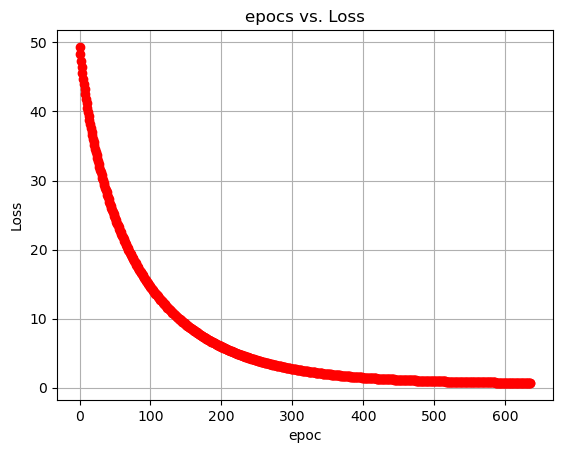

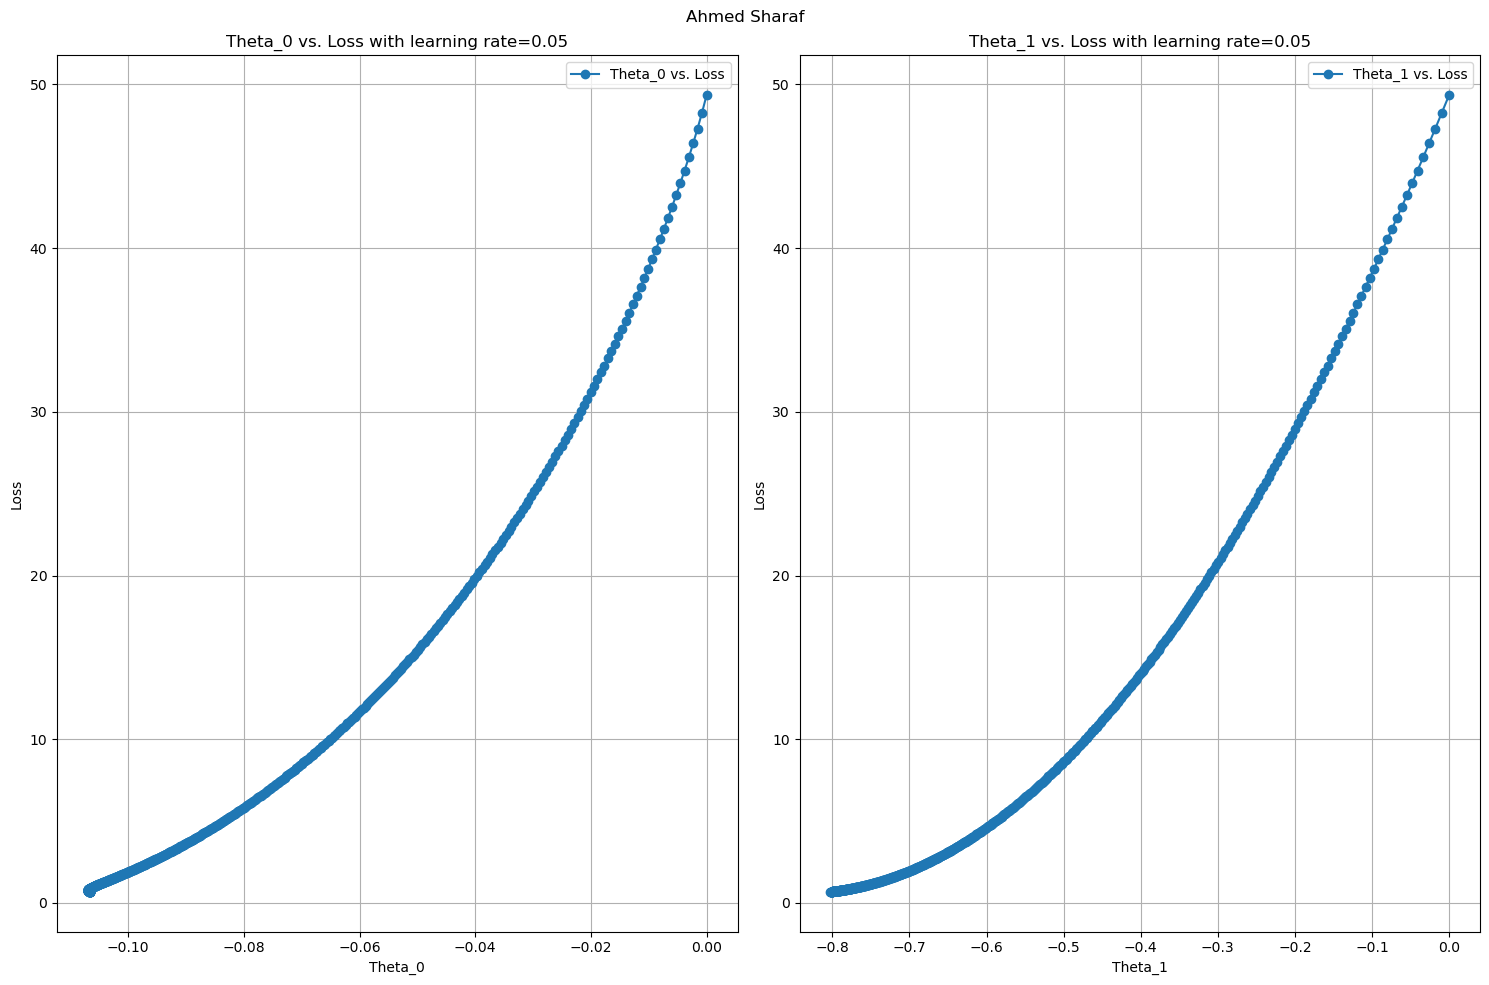

In [11]:
vis(X, y, y_pred, at0, at1, c, 0.05)

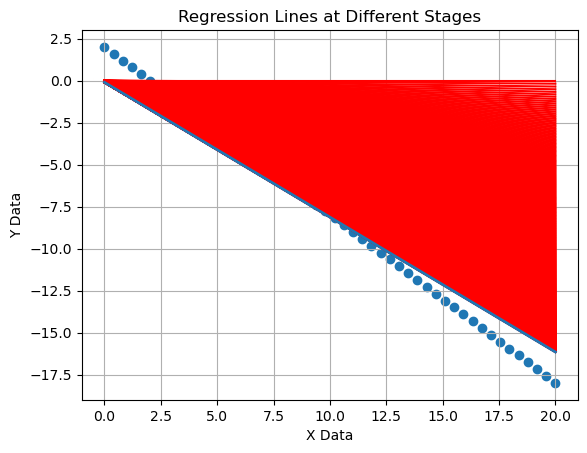

In [7]:
all_curve(X, y, at0, at1)

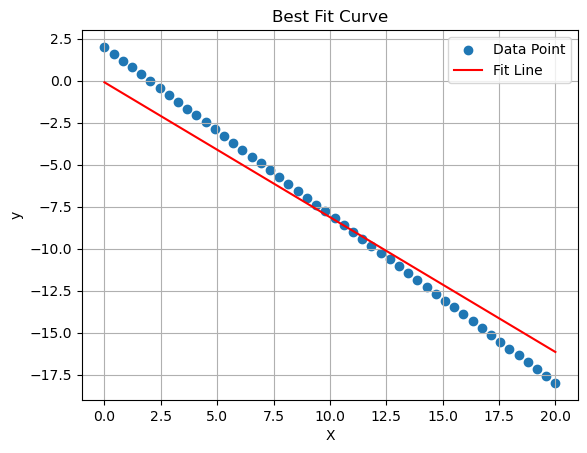

In [8]:
plt_best(X, y, y_pred)

###         2 - Implementation  RMSProp


In [12]:
def rmsprop(X, y, lr = 0.01, beta = 0.9, ellipson = 1e-08 ,itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    h = []
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    v_t_0 = 0
    v_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        h.append(y)
        
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        
        if norm_grad < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            break
            
        v_t_0 = (beta * v_t_0) + (1 - beta) * (theta_0_grad ** 2)
        v_t_1 = (beta * v_t_1) + (1 - beta) * (theta_1_grad ** 2)
        
        theta_0 = theta_0 - ( lr / (np.sqrt(v_t_0) + ellipson))  * theta_0_grad
        theta_1 = theta_1 - ( lr / (np.sqrt(v_t_1) + ellipson))  * theta_1_grad 
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses, h

## Example

In [18]:
t0, t1, at0, at1, c, h = rmsprop(X, y, 0.05,0.9,1e-08, itteration=500)
y_pred = t0 + t1 * X

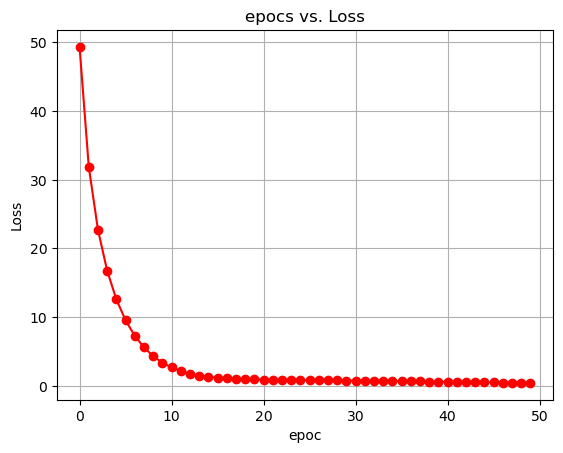

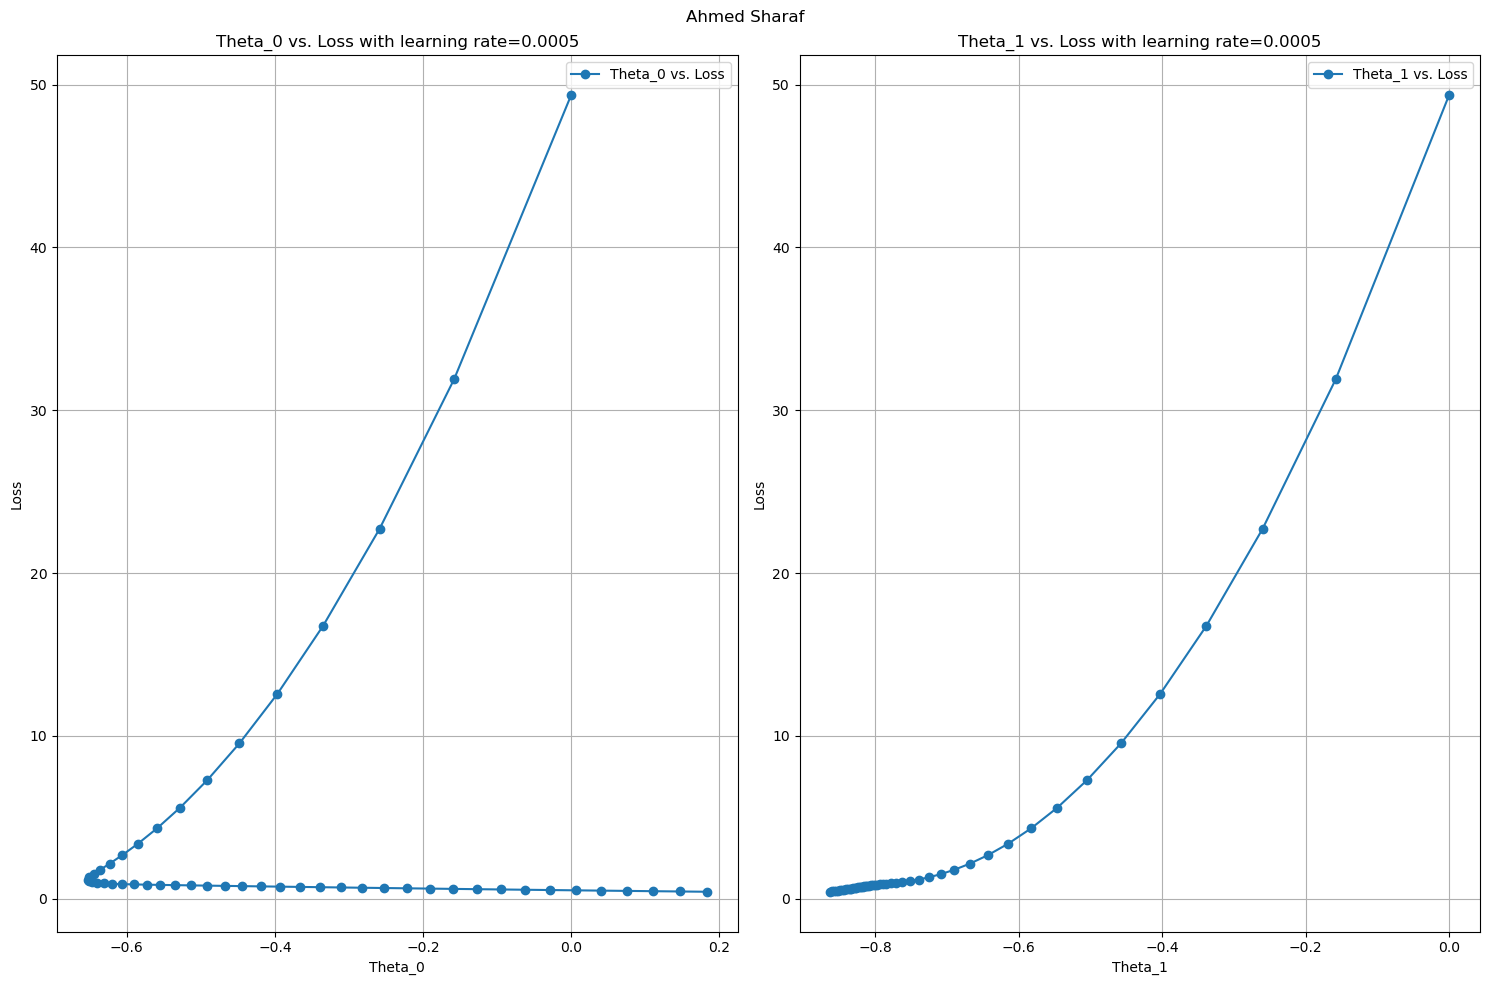

In [19]:
vis(X, y, y_pred, at0[:50], at1[:50], c[:50], 0.0005)

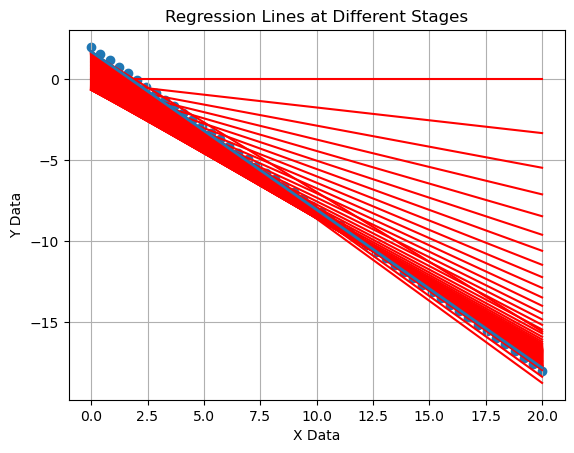

In [20]:
all_curve(X, y, at0, at1)

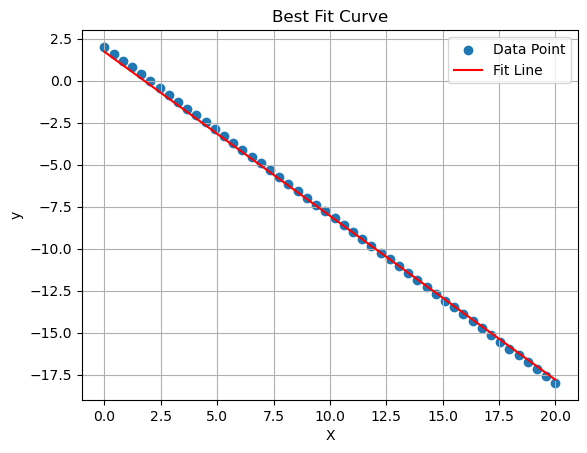

In [21]:
plt_best(X, y, y_pred)

###         2 - Implementation  Adam


In [22]:
def adam(X, y, lr = 0.01, beta1 = 0.9, beta2 = 0.9, ellipson = 1e-08 ,itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    h = []
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    m_t_0 = 0
    m_t_1 = 0
    
    v_t_0 = 0
    v_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        h.append(y)
        
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        
        if norm_grad < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            break
        
        m_t_0 = (beta1 * m_t_0) + (1 - beta1) * (theta_0_grad)
        m_t_1 = (beta1 * m_t_1) + (1 - beta1) * (theta_1_grad)
            
        v_t_0 = (beta2 * v_t_0) + (1 - beta2) * (theta_0_grad ** 2)
        v_t_1 = (beta2 * v_t_1) + (1 - beta2) * (theta_1_grad ** 2)
        
        m_hat_0 = m_t_0 / (1 - (beta1 ** (i + 1)))
        m_hat_1 = m_t_1 / (1 - (beta1 ** (i + 1)))
        
        v_hat_0 = v_t_0 / (1 - (beta2 ** (i + 1)))
        v_hat_1 = v_t_1 / (1 - (beta2 ** (i + 1)))
        
        theta_0 = theta_0 - ( lr / (np.sqrt(v_hat_0) + ellipson))  * m_hat_0
        theta_1 = theta_1 - ( lr / (np.sqrt(v_hat_1) + ellipson))  * m_hat_1 
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses, h

In [23]:
t0, t1, at0, at1, c, h = adam(X, y, 0.05, 0.2,0.7, 1e-08, itteration=500)
y_pred=t0+t1*X


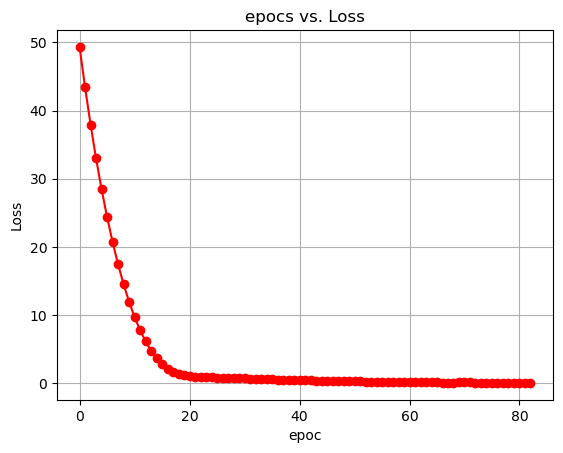

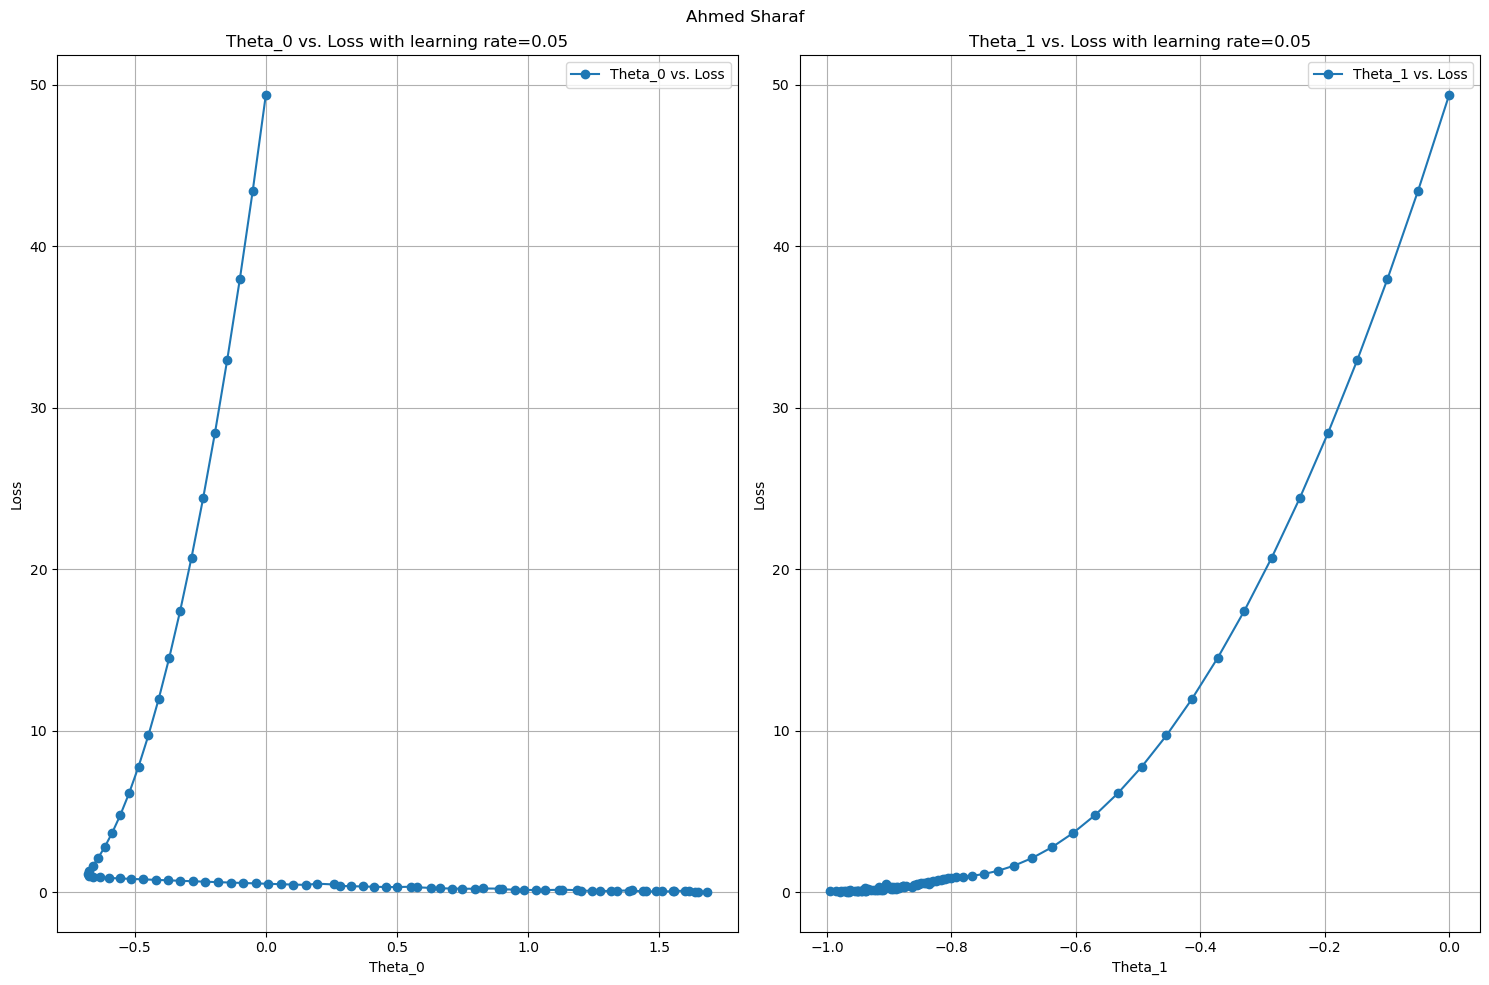

In [25]:
vis(X, y, y_pred, at0, at1, c, 0.05)

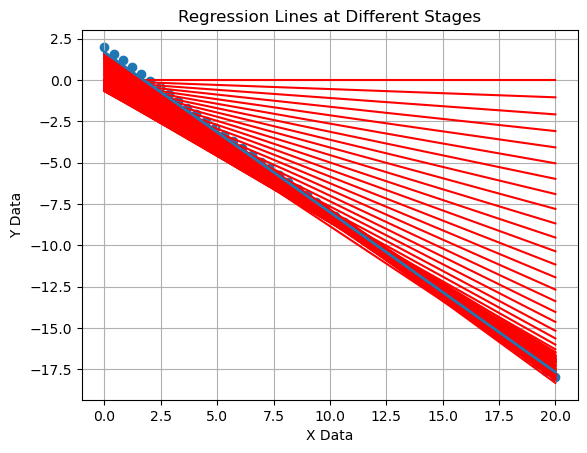

In [26]:
all_curve(X, y, at0, at1)

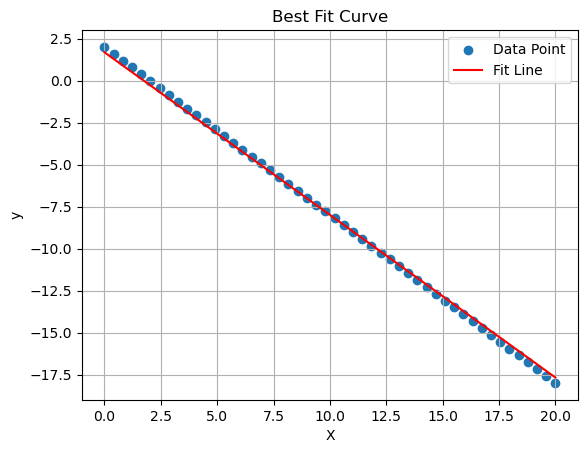

In [28]:
plt_best(X, y, y_pred)